# Loading Packages/Data

In [ ]:
import pandas as pd
from google_drive_downloader import GoogleDriveDownloader as gdd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gdd.download_file_from_google_drive(file_id='1HE_ezCVWG7JSy5fDSASAmrkmUUbPpWAC',
                                     dest_path='/content/trump_tweets.csv')
gdd.download_file_from_google_drive(file_id='1NJ8hZG5cr8p9w_uoXwnsz81D2B1uNOcG' , dest_path='/content/covid.csv')

#Intoduction

As the presidential election has just wrapped up shortly before this project, this group believes it is appropriate to take a more in-depth look at one of the most crucial factors in this election, COVID. We realized that one representative record of the executive branch's response to the pandemic is no other than President Trump's tweets. We want to put this (almost) real-time indicator of federal government response against the covid case curve and see whether some relationship exists between them. Ultimately, we are hoping to conclude certain features of the tweets are correlated to some change in covid cases before, or particular characteristics in tweets may lead to an increase/reduction in cases.


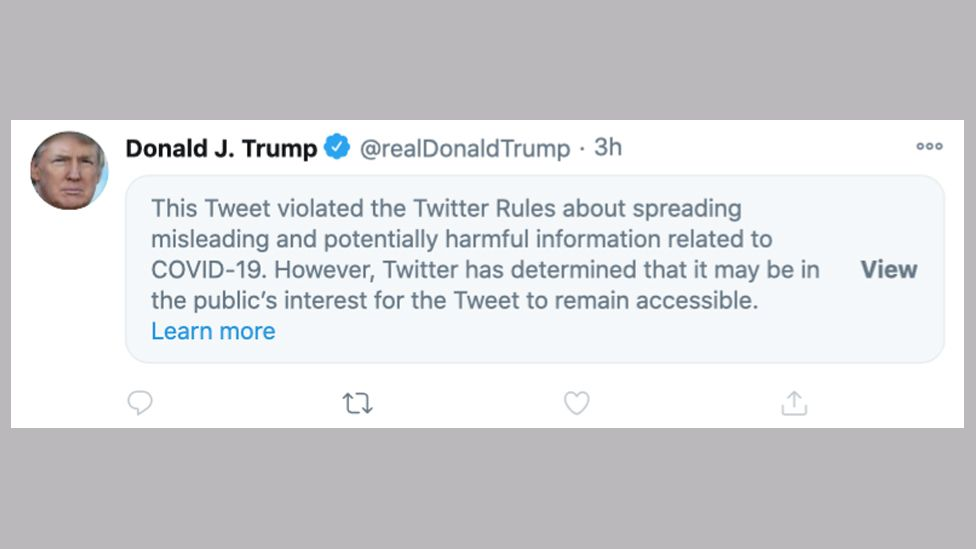

This group is planning to use two data sources to conduct data analysis. One source is a trump tweet dataset from “thetrumparchive.com.” We opted for this dataset instead of running the web scraping ourselves because this data set includes critical tweets that the President deleted, which would not be included if we scrape tweets directly from Trump’s account today. Secondly, we will use the covid dataset from JHU, which has US daily COVID case/death counts by county.
https://www.thetrumparchive.com/faq
https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university


# Data Cleaning

In this section, we are going to transform and combine the raw data in the two dataframes into one dataframe that contains the information we want.

##Visualize data from the dataset



We would like to read the `.csv` files into panda dataframes and take a look at the raw data first.

In [ ]:
trump_df = pd.read_csv('/content/trump_tweets.csv')
display(trump_df)

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59
...,...,...,...,...,...,...,...,...
55085,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25
55086,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05
55087,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58
55088,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21


In [ ]:
covid_df = pd.read_csv('/content/covid.csv')
display(covid_df)

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1985,1995,2006,2018,2021,2027,2040,2055,2070,2079,2098,2120,2134,2154,2168,2182,2195,2210,2229,2244,2257,2286,2307,2328,2328,2351,2385,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617,2634,2661,2686
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6350,6356,6384,6425,6459,6599,6619,6642,6677,6694,6728,6757,6879,6931,6955,6974,6991,7054,7093,7133,7184,7226,7263,7345,7348,7409,7454,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,978,978,984,993,1007,1010,1028,1030,1030,1038,1042,1052,1053,1058,1059,1062,1073,1077,1079,1089,1092,1095,1098,1107,1107,1112,1113,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160,1161,1167,1170
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,783,787,789,799,809,823,825,839,841,849,858,862,867,873,877,883,890,900,907,920,926,934,942,948,948,961,966,973,978,986,993,1004,1008,1011,1024,1036,1136,1142,1157,1162
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1837,1848,1863,1887,1907,1923,1934,1947,1958,1986,2002,2027,2054,2089,2109,2128,2178,2204,2233,2258,2290,2302,2338,2378,2378,2400,2429,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754,2763,2822,2855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,692,700,711,716,715,727,740,743,747,756,761,772,779,796,802,814,847,862,873,897,922,932,977,1007,1022,1025,1066,1108,1156,1178,1192,1252,1271,1298,1336,1360,1371,1433,1442,1476
3336,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,401,401,403,404,407,410,425,428,431,442,451,462,469,479,484,488,492,510,518,529,542,544,551,568,614,627,664,686,719,729,760,796,835,869,894,901,920,950,982,1016
3337,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3338,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133,134,135,139,142,143,144,145,145,146,151,153,153,158,159,160,160,167,175,179,188,185,187,190,197,199,203,206,208,218,227,253,263,274,290,298,315,325,339,395


## Cleaning trump_df

We would like to drop the ```id```'s, the links, the mentions and the hashtags as they are irrelevant to the model.
Since retweets and favorites indicate the extent of influence of the tweet, we decided to keep it in our model.

In [ ]:
trump_df = trump_df.drop(columns=['id', 'isRetweet', 'isDeleted', 'device'])
trump_df = trump_df.dropna(how='any')
trump_df

,text,favorites,retweets,date
0,Republicans and Democrats have both created ou...,49,255,2011-08-02 18:07:48
1,I was thrilled to be back in the Great city of...,73748,17404,2020-03-03 01:34:50
2,RT @CBS_Herridge: READ: Letter to surveillance...,0,7396,2020-01-17 03:22:47
3,The Unsolicited Mail In Ballot Scam is a major...,80527,23502,2020-09-12 20:10:58
4,RT @MZHemingway: Very friendly telling of even...,0,9081,2020-01-17 13:13:59
...,...,...,...,...
55085,RT @RandPaul: I don’t know why @JoeBiden think...,0,20683,2020-10-23 03:46:25
55086,RT @EliseStefanik: President @realDonaldTrump ...,0,9869,2020-10-23 03:42:05
55087,RT @TeamTrump: LIVE: Presidential Debate #Deba...,0,8197,2020-10-23 01:03:58
55088,Just signed an order to support the workers of...,176289,36001,2020-10-22 21:04:21


We would then like to look at the datatypes of the columns. Notice that the type for the column `date` is `object` and we are going to transform its type into `datetime` to better perform numerical operations.

In [ ]:
trump_df.dtypes

text         object
favorites     int64
retweets      int64
date         object
dtype: object

In [ ]:
trump_df['date'] = trump_df['date'].apply(lambda x : pd.to_datetime(x, format='%Y-%m-%d'))

Now we have our `date` column as `datetime64` objects.

In [ ]:
trump_df.dtypes

text                 object
favorites             int64
retweets              int64
date         datetime64[ns]
dtype: object

Since our COVID Data is only avaliable starting Jan.22, 2020, we only want to keep Trump's tweets after the date. <br>
Notice that the rows in the original dataframe is in arbitrary order, so we would like to sort them in the order of ascending `date`.

In [ ]:
trump_df = trump_df[trump_df['date'] >= '2020-1-22']
trump_df = trump_df.sort_values(by=['date'], ascending=True)
trump_df

,text,favorites,retweets,date
3192,RT @KatiePavlich: Schiff is claiming the Senat...,0,11073,2020-01-22 04:58:23
3207,RT @RepDLesko: Democrats rushed to impeach Pre...,0,6238,2020-01-22 04:58:33
3216,RT @GiannoCaldwell: I hope Republicans are pay...,0,10878,2020-01-22 05:00:52
3233,"RT @SenateGOP: ""This is the first time in hist...",0,4137,2020-01-22 05:01:15
3198,RT @GOPLeader: Speaker Pelosi's impeachment ma...,0,8293,2020-01-22 05:01:25
...,...,...,...,...
1087,"....Legislature. They just ignored that, ignor...",53553,13287,2020-11-06 16:28:41
1085,....has been able to render decisions in a mat...,102067,19257,2020-11-06 16:28:42
1086,....hopefully this will be corrected at the Su...,113524,22224,2020-11-06 16:28:42
1090,With the attack by the Radical Left Dems on th...,256141,45857,2020-11-06 16:37:01


Convert the yy-mm-dd date format into the number of days into that year, in order for the two dataframes to be merged more easily.

In [ ]:
first_day = pd.to_datetime('2020-1-1')
trump_df['date'] = trump_df['date'].apply(lambda x : (x - first_day).days + 1)
trump_df

,text,favorites,retweets,date
3192,RT @KatiePavlich: Schiff is claiming the Senat...,0,11073,22
3207,RT @RepDLesko: Democrats rushed to impeach Pre...,0,6238,22
3216,RT @GiannoCaldwell: I hope Republicans are pay...,0,10878,22
3233,"RT @SenateGOP: ""This is the first time in hist...",0,4137,22
3198,RT @GOPLeader: Speaker Pelosi's impeachment ma...,0,8293,22
...,...,...,...,...
1087,"....Legislature. They just ignored that, ignor...",53553,13287,311
1085,....has been able to render decisions in a mat...,102067,19257,311
1086,....hopefully this will be corrected at the Su...,113524,22224,311
1090,With the attack by the Radical Left Dems on th...,256141,45857,311


Extract retweet info and remove 'RT @xxx': we do not want the username in our tokens. Instead, we would like to add a column that indicates whether the tweet is a retweet. We would do so by customizing our `remove_bad_patterns` function taking use of regular expression matching.

In [ ]:
import re

def remove_bad_patterns(text):
    """Remove html, latex, and newline characters from a string
    
    :param text: content as a string
    :return: cleaned text string
    """
    text=re.sub('RT .*?: ', '',text) 
    
    return text

trump_df['is_retweet'] = trump_df['text'].apply(lambda x : True if x.find('RT')!=-1 else False)
trump_df['text']= trump_df['text'].apply(lambda x : remove_bad_patterns(x))
trump_df

,text,favorites,retweets,date,is_retweet
3192,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True
3207,Democrats rushed to impeach President @realDon...,0,6238,22,True
3216,I hope Republicans are paying close attention ...,0,10878,22,True
3233,"""This is the first time in history where a pre...",0,4137,22,True
3198,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True
...,...,...,...,...,...
1087,"....Legislature. They just ignored that, ignor...",53553,13287,311,False
1085,....has been able to render decisions in a mat...,102067,19257,311,False
1086,....hopefully this will be corrected at the Su...,113524,22224,311,False
1090,With the attack by the Radical Left Dems on th...,256141,45857,311,False


Searh through the text to determine if some tweets contain @ or links and use one column for each piece of information. We would like to classsify any tweet containing the substring "http" as one containing a link. Also compute the cap ratio and add a column to store it.

In [ ]:
def contains_mention(text):
  return "@" in text

def contains_link(text):
  return "http" in text

def get_cap_ratio(text):
  total_count = 0
  cap_count = 0
  for char in text:
    if not char.isalpha():
      continue
    total_count += 1
    if char.isupper():
      cap_count += 1
  if total_count == 0:
    return 0
  return cap_count / total_count

In [ ]:
trump_df['contains_mention'] = trump_df['text'].apply(lambda x : contains_mention(x))
trump_df['contains_link'] = trump_df['text'].apply(lambda x : contains_link(x))
trump_df['cap_ratio'] = trump_df['text'].apply(lambda x : get_cap_ratio(x))

We would like to reset the index of the rows and drop the `index` column.

In [ ]:
trump_df = trump_df.reset_index()
trump_df = trump_df.drop(columns=['index'])
trump_df = trump_df.drop(columns=['level_0'])

The cleaned `trump_df` has shape 10481 by 8:

In [ ]:
trump_df

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252
...,...,...,...,...,...,...,...,...
10476,"....Legislature. They just ignored that, ignor...",53553,13287,311,False,False,False,0.022624
10477,....has been able to render decisions in a mat...,102067,19257,311,False,True,False,0.060241
10478,....hopefully this will be corrected at the Su...,113524,22224,311,False,False,False,0.059140
10479,With the attack by the Radical Left Dems on th...,256141,45857,311,False,False,False,0.076923


## Cleaning covid_df

For `covid_df`, the only information that we're interested in is the number of confirmed cases on a given day. Therefore, we would first drop all other unnecessary columns:

We also created another df `covid_with_states_df` to take state political affiliation into consideration. 

Reference for political affiliation:
https://www.nbcnews.com/politics/2020-elections/president-results

In [ ]:
covid_with_states_df = covid_df.drop(columns=['Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
display(covid_with_states_df)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
0,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1985,1995,2006,2018,2021,2027,2040,2055,2070,2079,2098,2120,2134,2154,2168,2182,2195,2210,2229,2244,2257,2286,2307,2328,2328,2351,2385,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617,2634,2661,2686
1,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6350,6356,6384,6425,6459,6599,6619,6642,6677,6694,6728,6757,6879,6931,6955,6974,6991,7054,7093,7133,7184,7226,7263,7345,7348,7409,7454,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473
2,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,978,978,984,993,1007,1010,1028,1030,1030,1038,1042,1052,1053,1058,1059,1062,1073,1077,1079,1089,1092,1095,1098,1107,1107,1112,1113,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160,1161,1167,1170
3,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,783,787,789,799,809,823,825,839,841,849,858,862,867,873,877,883,890,900,907,920,926,934,942,948,948,961,966,973,978,986,993,1004,1008,1011,1024,1036,1136,1142,1157,1162
4,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1837,1848,1863,1887,1907,1923,1934,1947,1958,1986,2002,2027,2054,2089,2109,2128,2178,2204,2233,2258,2290,2302,2338,2378,2378,2400,2429,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754,2763,2822,2855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,Wyoming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,692,700,711,716,715,727,740,743,747,756,761,772,779,796,802,814,847,862,873,897,922,932,977,1007,1022,1025,1066,1108,1156,1178,1192,1252,1271,1298,1336,1360,1371,1433,1442,1476
3336,Wyoming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,401,401,403,404,407,410,425,428,431,442,451,462,469,479,484,488,492,510,518,529,542,544,551,568,614,627,664,686,719,729,760,796,835,869,894,901,920,950,982,1016
3337,Wyoming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3338,Wyoming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133,134,135,139,142,143,144,145,145,146,151,153,153,158,159,160,160,167,175,179,188,185,187,190,197,199,203,206,208,218,227,253,263,274,290,298,315,325,339,395


We would like to group all the rows describing the same state together and convert the type of `Province_State` to `string`.

In [ ]:
covid_state_summed_df = covid_with_states_df.groupby(by = ['Province_State']).sum().reset_index()
covid_state_summed_df['Province_State'] = covid_state_summed_df['Province_State'].astype('str') 

## Combining trump_df and covid_df

### Cleaned and combined dataframe of battleground states

We defined the classification of battleground/ gop/ dem states in lists.

In [ ]:
battle_lst = ['Arizona', 'Florida', 'Georgia', 'Iowa', 'Michigan', 'Minnesota', 'Nevada', 'New Hampshire', 'North Carolina', 'Ohio', 'Pennsylvania', 'Texas', 'Wisconsin']
gop_lst = ['Alabama', 'Alaska', 'Arkansas', 'Florida', 'Idaho', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Utah', 'West Virginia', 'Wyoming']
dem_lst = ['California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Hawaii', 'Illinois', 'Maine', 'Maryland', 'Massachusetts', 'New Jersey', 'New Mexico', 'New York', 'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 'Washington']

We extracted information from ```covid_with_states_df``` and according to the states' political affliation, created 3 dataframes each with a column to denote whether Covid cases ```increased_faster``` on each day.

Steps: 
`daily_confirmed` is a dictionary of cumulative total confirmed cases on a daily basis.

`daily_new_confirmed` is a dictionary of newly diagonosed cases on each day, computed from subtracting the case number of the previous day from the case number of the current day. 

`has_increased` is a dictionary indicating if the growth rate has increased (1) or decreased (0). We decide to use the growth rate as a feature because the number of cases is almost growing everyday, but its growth rate has more variations.

In [ ]:
covid_battle_state_df = covid_state_summed_df[covid_state_summed_df['Province_State'].isin(battle_lst)].reset_index().drop(columns=['index', 'Province_State'])
#display(covid_battle_state_df)

daily_confirmed_battle = {}
for i in range(0, len(covid_battle_state_df.columns)):
  daily_confirmed_battle[i + 22] = covid_battle_state_df.iloc[:, i].sum()

num_days = (pd.to_datetime('2020-11-06') - first_day).days + 1
daily_new_confirmed_battle = {}
daily_new_confirmed_battle[22] = 1
for i in range(23, num_days+1):
  daily_new_confirmed_battle[i] = daily_confirmed_battle[i] - daily_confirmed_battle[i - 1]

has_increased_battle = {}
has_increased_battle[22] = 1
for i in range(23, num_days+1):
  if daily_new_confirmed_battle[i] > daily_new_confirmed_battle[i - 1]:
    has_increased_battle[i] = 1
  else:
    has_increased_battle[i] = 0

In [ ]:
trump_battle_df = trump_df.copy()
trump_battle_df['increased_faster'] = trump_battle_df['date'].apply(lambda x : has_increased_battle[x])
trump_battle_df

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,increased_faster
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408,1
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505,1
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000,1
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417,1
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252,1
...,...,...,...,...,...,...,...,...,...
10476,"....Legislature. They just ignored that, ignor...",53553,13287,311,False,False,False,0.022624,0
10477,....has been able to render decisions in a mat...,102067,19257,311,False,True,False,0.060241,0
10478,....hopefully this will be corrected at the Su...,113524,22224,311,False,False,False,0.059140,0
10479,With the attack by the Radical Left Dems on th...,256141,45857,311,False,False,False,0.076923,0


### Cleaned and combined dataframe of democratic states

Same code just repeated for dem states.

In [ ]:
covid_dem_state_df = covid_state_summed_df[covid_state_summed_df['Province_State'].isin(dem_lst)].reset_index().drop(columns=['index', 'Province_State'])

daily_confirmed_dem = {}
for i in range(0, len(covid_dem_state_df.columns)):
  daily_confirmed_dem[i + 22] = covid_dem_state_df.iloc[:, i].sum()

daily_new_confirmed_dem = {}
daily_new_confirmed_dem[22] = 1
for i in range(23, num_days+1):
  daily_new_confirmed_dem[i] = daily_confirmed_dem[i] - daily_confirmed_dem[i - 1]

has_increased_dem = {}
has_increased_dem[22] = 1
for i in range(23, num_days+1):
  if daily_new_confirmed_dem[i] > daily_new_confirmed_dem[i - 1]:
    has_increased_dem[i] = 1
  else:
    has_increased_dem[i] = 0

In [ ]:
trump_dem_df = trump_df.copy()
trump_dem_df['increased_faster'] = trump_dem_df['date'].apply(lambda x : has_increased_dem[x])
trump_dem_df

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,increased_faster
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408,1
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505,1
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000,1
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417,1
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252,1
...,...,...,...,...,...,...,...,...,...
10476,"....Legislature. They just ignored that, ignor...",53553,13287,311,False,False,False,0.022624,1
10477,....has been able to render decisions in a mat...,102067,19257,311,False,True,False,0.060241,1
10478,....hopefully this will be corrected at the Su...,113524,22224,311,False,False,False,0.059140,1
10479,With the attack by the Radical Left Dems on th...,256141,45857,311,False,False,False,0.076923,1


### Cleaned and combined dataframe of republican states

Same code just repeated for gop states.

In [ ]:
covid_gop_state_df = covid_state_summed_df[covid_state_summed_df['Province_State'].isin(gop_lst)].reset_index().drop(columns=['index', 'Province_State'])

daily_confirmed_gop = {}
for i in range(0, len(covid_gop_state_df.columns)):
  daily_confirmed_gop[i + 22] = covid_gop_state_df.iloc[:, i].sum()

daily_new_confirmed_gop = {}
daily_new_confirmed_gop[22] = 1
for i in range(23, num_days+1):
  daily_new_confirmed_gop[i] = daily_confirmed_gop[i] - daily_confirmed_gop[i - 1]

has_increased_gop = {}
has_increased_gop[22] = 1
for i in range(23, num_days+1):
  if daily_new_confirmed_gop[i] > daily_new_confirmed_gop[i - 1]:
    has_increased_gop[i] = 1
  else:
    has_increased_gop[i] = 0

In [ ]:
trump_gop_df = trump_df.copy()
trump_gop_df['increased_faster'] = trump_gop_df['date'].apply(lambda x : has_increased_gop[x])
trump_gop_df

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,increased_faster
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408,1
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505,1
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000,1
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417,1
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252,1
...,...,...,...,...,...,...,...,...,...
10476,"....Legislature. They just ignored that, ignor...",53553,13287,311,False,False,False,0.022624,0
10477,....has been able to render decisions in a mat...,102067,19257,311,False,True,False,0.060241,0
10478,....hopefully this will be corrected at the Su...,113524,22224,311,False,False,False,0.059140,0
10479,With the attack by the Radical Left Dems on th...,256141,45857,311,False,False,False,0.076923,0


### Cleaned and combined dataframe for all states and territories. 

Same code just repeated for all states.

In [ ]:
covid_df = covid_with_states_df.drop(columns=['Province_State'])
display(covid_df)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1985,1995,2006,2018,2021,2027,2040,2055,2070,2079,2098,2120,2134,2154,2168,2182,2195,2210,2229,2244,2257,2286,2307,2328,2328,2351,2385,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617,2634,2661,2686
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6350,6356,6384,6425,6459,6599,6619,6642,6677,6694,6728,6757,6879,6931,6955,6974,6991,7054,7093,7133,7184,7226,7263,7345,7348,7409,7454,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,978,978,984,993,1007,1010,1028,1030,1030,1038,1042,1052,1053,1058,1059,1062,1073,1077,1079,1089,1092,1095,1098,1107,1107,1112,1113,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160,1161,1167,1170
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,783,787,789,799,809,823,825,839,841,849,858,862,867,873,877,883,890,900,907,920,926,934,942,948,948,961,966,973,978,986,993,1004,1008,1011,1024,1036,1136,1142,1157,1162
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1837,1848,1863,1887,1907,1923,1934,1947,1958,1986,2002,2027,2054,2089,2109,2128,2178,2204,2233,2258,2290,2302,2338,2378,2378,2400,2429,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754,2763,2822,2855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,692,700,711,716,715,727,740,743,747,756,761,772,779,796,802,814,847,862,873,897,922,932,977,1007,1022,1025,1066,1108,1156,1178,1192,1252,1271,1298,1336,1360,1371,1433,1442,1476
3336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,401,401,403,404,407,410,425,428,431,442,451,462,469,479,484,488,492,510,518,529,542,544,551,568,614,627,664,686,719,729,760,796,835,869,894,901,920,950,982,1016
3337,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3338,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133,134,135,139,142,143,144,145,145,146,151,153,153,158,159,160,160,167,175,179,188,185,187,190,197,199,203,206,208,218,227,253,263,274,290,298,315,325,339,395


In [ ]:
daily_confirmed = {}
for i in range(0, len(covid_df.columns)):
  daily_confirmed[i + 22] = covid_df.iloc[:, i].sum()

num_days = (pd.to_datetime('2020-11-06') - first_day).days + 1
daily_new_confirmed = {}
daily_new_confirmed[22] = 1
for i in range(23, num_days+1):
  daily_new_confirmed[i] = daily_confirmed[i] - daily_confirmed[i - 1]

has_increased = {}
has_increased[22] = 1
for i in range(23, num_days+1):
  if daily_new_confirmed[i] > daily_new_confirmed[i - 1]:
    has_increased[i] = 1
  else:
    has_increased[i] = 0

In [ ]:
trump_all_df = trump_df.copy()
trump_all_df['increased_faster'] = trump_all_df['date'].apply(lambda x : has_increased[x])
trump_all_df

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,increased_faster
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408,1
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505,1
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000,1
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417,1
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252,1
...,...,...,...,...,...,...,...,...,...
10476,"....Legislature. They just ignored that, ignor...",53553,13287,311,False,False,False,0.022624,0
10477,....has been able to render decisions in a mat...,102067,19257,311,False,True,False,0.060241,0
10478,....hopefully this will be corrected at the Su...,113524,22224,311,False,False,False,0.059140,0
10479,With the attack by the Radical Left Dems on th...,256141,45857,311,False,False,False,0.076923,0


Now we plot to visualize the growth of Covid case number for battleground states, democratic states, and republican states. And we also computed the averaged slopes of these three lines. 

Comparing the line for dem and gop, we can see that the cumulative Covid case number increased faster for the democratic states in the beginning stage. Then at around day 125 (2020-05-04), the growth rate for cumulative diagonosed case number for democratic states started to slow down. At around day 170 (2020-06-18), the cumulative diagonosed case number for the republican states started to increase at high rate.  

Observe the number of states in each list we used.

In [ ]:
import datetime as dt
print("Number of states in battle_lst: ", len(battle_lst))
print("Number of states in dem_lst: ", len(dem_lst))
print("Number of states in gop_lst: ", len(gop_lst))

Number of states in battle_lst:  13
Number of states in dem_lst:  18
Number of states in gop_lst:  21


In [ ]:
first_day + dt.timedelta(days=(125-1))

Timestamp('2020-05-04 00:00:00')

In [ ]:
first_day + dt.timedelta(days=(170-1))

Timestamp('2020-06-18 00:00:00')

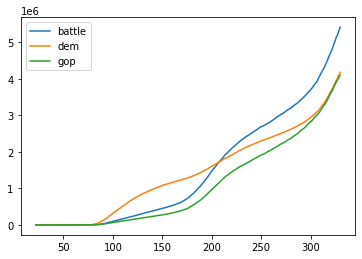

In [ ]:
df = pd.DataFrame({'battle': daily_confirmed_battle, 'dem': daily_confirmed_dem, 'gop': daily_confirmed_gop})
df.plot()

slopes = df.apply(lambda x: np.polyfit(df.index, x, 1)[0])

In [ ]:
slopes

battle    16168.294444
dem       12492.531350
gop       12063.666590
dtype: float64

### Resulting four dataframes

In this section, we are going to take a look at the four resulting dataframes.

In [ ]:
trump_all_df

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,increased_faster
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408,1
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505,1
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000,1
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417,1
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252,1
...,...,...,...,...,...,...,...,...,...
10476,"....Legislature. They just ignored that, ignor...",53553,13287,311,False,False,False,0.022624,0
10477,....has been able to render decisions in a mat...,102067,19257,311,False,True,False,0.060241,0
10478,....hopefully this will be corrected at the Su...,113524,22224,311,False,False,False,0.059140,0
10479,With the attack by the Radical Left Dems on th...,256141,45857,311,False,False,False,0.076923,0


In [ ]:
trump_battle_df

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,increased_faster
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408,1
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505,1
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000,1
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417,1
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252,1
...,...,...,...,...,...,...,...,...,...
10476,"....Legislature. They just ignored that, ignor...",53553,13287,311,False,False,False,0.022624,0
10477,....has been able to render decisions in a mat...,102067,19257,311,False,True,False,0.060241,0
10478,....hopefully this will be corrected at the Su...,113524,22224,311,False,False,False,0.059140,0
10479,With the attack by the Radical Left Dems on th...,256141,45857,311,False,False,False,0.076923,0


In [ ]:
trump_dem_df

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,increased_faster
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408,1
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505,1
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000,1
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417,1
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252,1
...,...,...,...,...,...,...,...,...,...
10476,"....Legislature. They just ignored that, ignor...",53553,13287,311,False,False,False,0.022624,1
10477,....has been able to render decisions in a mat...,102067,19257,311,False,True,False,0.060241,1
10478,....hopefully this will be corrected at the Su...,113524,22224,311,False,False,False,0.059140,1
10479,With the attack by the Radical Left Dems on th...,256141,45857,311,False,False,False,0.076923,1


In [ ]:
trump_gop_df

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,increased_faster
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408,1
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505,1
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000,1
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417,1
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252,1
...,...,...,...,...,...,...,...,...,...
10476,"....Legislature. They just ignored that, ignor...",53553,13287,311,False,False,False,0.022624,0
10477,....has been able to render decisions in a mat...,102067,19257,311,False,True,False,0.060241,0
10478,....hopefully this will be corrected at the Su...,113524,22224,311,False,False,False,0.059140,0
10479,With the attack by the Radical Left Dems on th...,256141,45857,311,False,False,False,0.076923,0


Realizing that we can store our dataframes more efficiently, we combined ```increased_faster``` information into one dataframe: `trump_all_df`

In [ ]:
trump_all_df["dem_increased_faster"] = trump_dem_df["increased_faster"]
trump_all_df["gop_increased_faster"] = trump_gop_df["increased_faster"]
trump_all_df["battle_increased_faster"] = trump_battle_df["increased_faster"]
trump_all_df["all_increased_faster"] = trump_all_df["increased_faster"]
trump_all_df.drop(columns=["increased_faster"], inplace = True)

In [ ]:
trump_all_df

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,dem_increased_faster,gop_increased_faster,battle_increased_faster,all_increased_faster
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408,1,1,1,1
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505,1,1,1,1
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000,1,1,1,1
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417,1,1,1,1
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10476,"....Legislature. They just ignored that, ignor...",53553,13287,311,False,False,False,0.022624,1,0,0,0
10477,....has been able to render decisions in a mat...,102067,19257,311,False,True,False,0.060241,1,0,0,0
10478,....hopefully this will be corrected at the Su...,113524,22224,311,False,False,False,0.059140,1,0,0,0
10479,With the attack by the Radical Left Dems on th...,256141,45857,311,False,False,False,0.076923,1,0,0,0


# NLTK Processing

To make insightful decisions using our tweets data, we need to extract meaningful features from the text based tweets. NLTK is a leading platform for building Python programs to work with human language data. To use it, we first would need to tokenize the text. We are going to customize our tokenizer starting from ```nltk.tokenizer```.

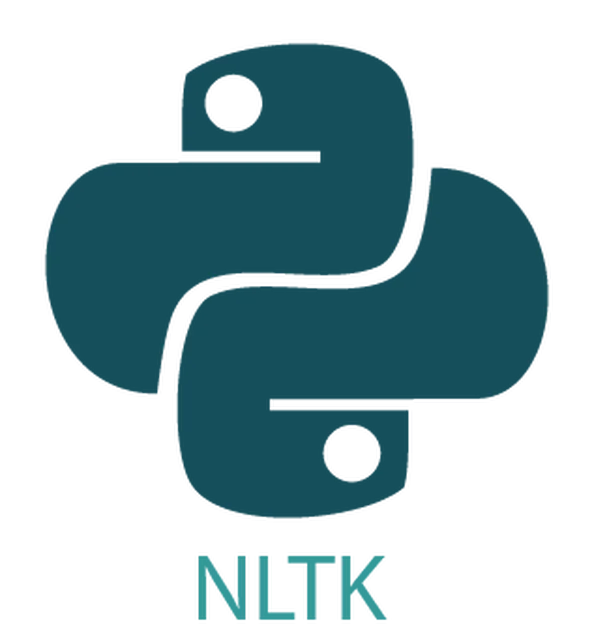

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.add('rt')
stopwords.add('https')
stopwords.add('realdonaldtrump')
stopwords.add('amp')

def tokenize(content):
  words = word_tokenize(content)
  words = [word.lower() for word in words if word.isalpha()]

  A = [i for i in words if i not in stopwords]
  return A

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
trump_all_df['tokenized_text'] = trump_all_df['text'].apply(lambda x : tokenize(x))
trump_all_df

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,dem_increased_faster,gop_increased_faster,battle_increased_faster,all_increased_faster,tokenized_text
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408,1,1,1,1,"[schiff, claiming, senate, must, call, importa..."
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505,1,1,1,1,"[democrats, rushed, impeach, president, ignori..."
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000,1,1,1,1,"[hope, republicans, paying, close, attention, ..."
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417,1,1,1,1,"[first, time, history, president, impeached, e..."
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252,1,1,1,1,"[speaker, pelosi, impeachment, managers, chair..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,"....Legislature. They just ignored that, ignor...",53553,13287,311,False,False,False,0.022624,1,0,0,0,"[ignored, ignored, constitution, bring, counti..."
10477,....has been able to render decisions in a mat...,102067,19257,311,False,True,False,0.060241,1,0,0,0,"[able, render, decisions, matter, ken, starr, ..."
10478,....hopefully this will be corrected at the Su...,113524,22224,311,False,False,False,0.059140,1,0,0,0,"[corrected, supreme, court, united, states, al..."
10479,With the attack by the Radical Left Dems on th...,256141,45857,311,False,False,False,0.076923,1,0,0,0,"[attack, radical, left, dems, republican, sena..."


We would also like to add a column that indicates whethers the tweet mentions COVID-19 related things. If ```tokenized_text``` contains any of the word "covid", "coronavirus", "virus" or "covidview", then we are going to put a "1" in the column. Otherwise we're going to put a "0".

In [ ]:
def contains_covid(tokenized_text):
  for word in tokenized_text:
    if word == "covid" or word == "coronavirus" or word == "virus" or word == "covidview":
      return 1
  return 0

In [ ]:
trump_all_df['contains_covid'] = trump_all_df['tokenized_text'].apply(lambda x : contains_covid(x))
trump_all_df

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,dem_increased_faster,gop_increased_faster,battle_increased_faster,all_increased_faster,tokenized_text,contains_covid
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408,1,1,1,1,"[schiff, claiming, senate, must, call, importa...",0
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505,1,1,1,1,"[democrats, rushed, impeach, president, ignori...",0
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000,1,1,1,1,"[hope, republicans, paying, close, attention, ...",0
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417,1,1,1,1,"[first, time, history, president, impeached, e...",0
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252,1,1,1,1,"[speaker, pelosi, impeachment, managers, chair...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,"....Legislature. They just ignored that, ignor...",53553,13287,311,False,False,False,0.022624,1,0,0,0,"[ignored, ignored, constitution, bring, counti...",0
10477,....has been able to render decisions in a mat...,102067,19257,311,False,True,False,0.060241,1,0,0,0,"[able, render, decisions, matter, ken, starr, ...",0
10478,....hopefully this will be corrected at the Su...,113524,22224,311,False,False,False,0.059140,1,0,0,0,"[corrected, supreme, court, united, states, al...",0
10479,With the attack by the Radical Left Dems on th...,256141,45857,311,False,False,False,0.076923,1,0,0,0,"[attack, radical, left, dems, republican, sena...",0


Let's quickly visualize the number of tweets the President tweeted each day during our period.

In [ ]:
trump_tweetcount_df = trump_all_df.copy()
trump_tweetcount_df = trump_tweetcount_df.groupby(['date']).count().reset_index()[["date", "text"]]
trump_tweetcount_df

,date,text
0,22,144
1,23,25
2,24,62
3,25,72
4,26,55
...,...,...
285,307,73
286,308,50
287,309,16
288,310,12


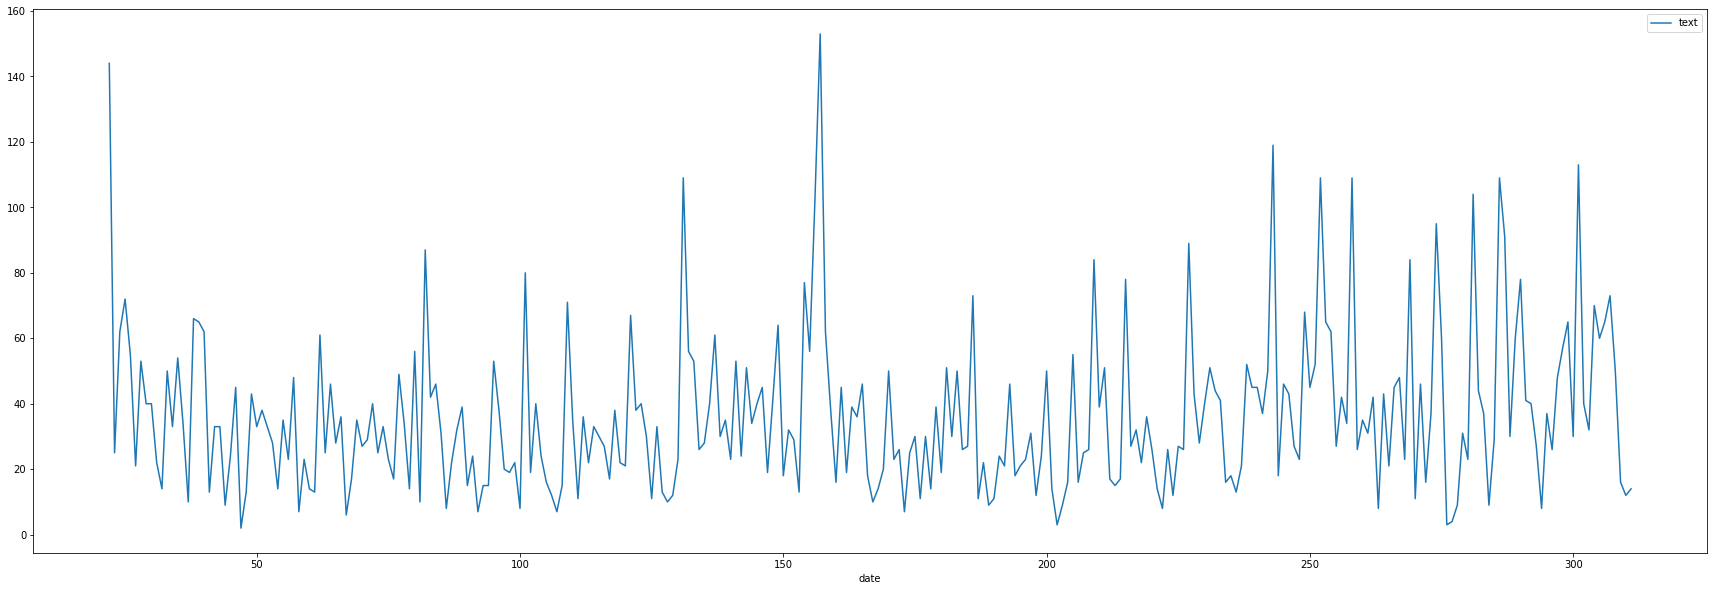

In [ ]:
trump_tweetcount_df.plot(x ='date', y='text', kind = 'line', figsize=(30,10))

We converted the number of days since our first day 2020-1-1 to datetime to have a better idea of on which day did the max and min occurred. 

In [ ]:
first_day = pd.to_datetime('2020-1-1')
trump_tweetcount_df['date'] = trump_tweetcount_df['date'].apply(lambda x : first_day + dt.timedelta(days=(x-1)))
trump_tweetcount_df.sort_values(by=['text'], inplace = True)
trump_tweetcount_df

,date,text
25,2020-02-16,2
180,2020-07-20,3
254,2020-10-02,3
255,2020-10-03,4
45,2020-03-07,6
...,...,...
230,2020-09-08,109
279,2020-10-27,113
221,2020-08-30,119
0,2020-01-22,144


Here we see that during the 290 days window, President Trump tweets more than 36 tweets per day and posted at most 153 tweets on June 5th, 2020.

Another observation is that: connecting back to our previous finding that the diagonosed Covid case number for republican states started to rapidly increase at around 2020-06-18. The date with the most Covid cases for the republican states and the date when Trump had the most tweets are very close to each other. 

A quick search revealed that June 5th, 2020 was the day President Trump called it a "great day" for George Floyd.

One suspection is that Trump's tweets might trigger more people to go out and gather, thus increased the chance of them getting infected. 

In [ ]:
tweet_count_series = pd.Series(trump_tweetcount_df['text'].tolist())
tweet_count_series.describe()

count    290.000000
mean      36.141379
std       24.395899
min        2.000000
25%       19.000000
50%       31.000000
75%       46.000000
max      153.000000
dtype: float64

#Tweets Visualization

Let's get a rough understanding of what President trump said (with a word cloud).

In [ ]:
tokenized_tweets = trump_all_df['tokenized_text'].tolist()

In [ ]:
nltk.download('punkt')
from wordcloud import WordCloud
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


We used the ```Counter``` object to count the occurences of each word in our tokenized word list. After populating the counter, we can take a look at the most frequent 20 words that Trump has said. 

In [ ]:
counter = Counter()
for tweet in tokenized_tweets:
  for word in tweet:
    counter[word] += 1

highest = counter.most_common(20)
highest

[('great', 1148),
 ('president', 1125),
 ('trump', 872),
 ('biden', 871),
 ('people', 727),
 ('thank', 659),
 ('joe', 644),
 ('news', 541),
 ('new', 482),
 ('democrats', 471),
 ('america', 445),
 ('vote', 444),
 ('american', 413),
 ('big', 402),
 ('fake', 393),
 ('get', 386),
 ('today', 371),
 ('would', 366),
 ('country', 365),
 ('never', 343)]

To better visualize the most frequent words, below is a wordcloud based on the frequency of tokens:

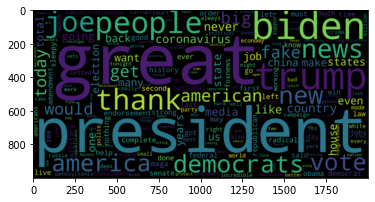

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=2000, height=1000).generate_from_frequencies(counter)
plt.imshow(wordcloud, interpolation="bilinear")

The below wordcloud is computed after seperating tweets on dates where COVID cases in DEM states increased faster or slower.

In [ ]:
trump_dem_increased_df = trump_all_df[trump_all_df['dem_increased_faster'] == 1]
trump_dem_decreased_df = trump_all_df[trump_all_df['dem_increased_faster'] == 0]
tokenized_increased_tweets_dem = trump_dem_increased_df['tokenized_text'].tolist()
tokenized_decreased_tweets_dem = trump_dem_decreased_df['tokenized_text'].tolist()
increased_counter_dem = Counter()
decreased_counter_dem = Counter()
for tweet in tokenized_increased_tweets_dem:
  for word in tweet:
    increased_counter_dem[word] += 1
    decreased_counter_dem[word] -= 1

for tweet in tokenized_decreased_tweets_dem:
  for word in tweet:
    increased_counter_dem[word] -= 1
    decreased_counter_dem[word] += 1

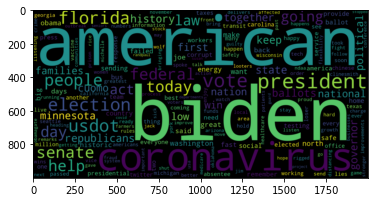

In [ ]:
wordcloud_increased_dem = WordCloud(width=2000, height=1000).generate_from_frequencies(increased_counter_dem)
plt.imshow(wordcloud_increased_dem, interpolation="bilinear")

From this wordcloud, we can see that words related to the presidential election, such "biden", "election", "president", "vote" and "political", are associated with a faster growth rate of confirmed cases. Therefore, we suspect that people tend to gather or vote in person after reading Trump's tweets, and thus increase their exposure to the virus.

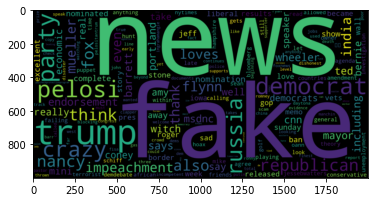

In [ ]:
wordcloud_decreased_dem = WordCloud(width=2000, height=1000).generate_from_frequencies(decreased_counter_dem)
plt.imshow(wordcloud_decreased_dem, interpolation="bilinear")

From this wordcloud, we can see that "fake" and "news" are the two most frequently occuring words that are associated with a slower rate of growth. This trend might be attributed to Trump downplaying the harm of coronavirus when the number confirmed cases is growing more slowly.

In [ ]:
trump_increased_df = trump_all_df[trump_all_df['all_increased_faster'] == 1]
trump_decreased_df = trump_all_df[trump_all_df['all_increased_faster'] == 0]
tokenized_increased_tweets = trump_increased_df['tokenized_text'].tolist()
tokenized_decreased_tweets = trump_decreased_df['tokenized_text'].tolist()

After looking at the most frequent words in the tweets that influence the DEM states, we would like to look at those associated with ALL states. The below wordcloud is computed after seperating tweets on dates where COVID cases in ALL states increased faster or slower.

In [ ]:
increased_counter = Counter()
decreased_counter = Counter()
for tweet in tokenized_increased_tweets:
  for word in tweet:
    increased_counter[word] += 1
    decreased_counter[word] -= 1

for tweet in tokenized_decreased_tweets:
  for word in tweet:
    increased_counter[word] -= 1
    decreased_counter[word] += 1

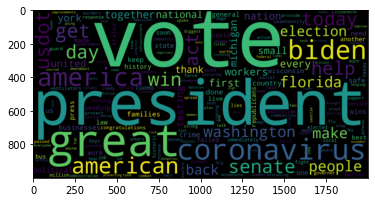

In [ ]:
wordcloud_increased = WordCloud(width=2000, height=1000).generate_from_frequencies(increased_counter)
plt.imshow(wordcloud_increased, interpolation="bilinear")

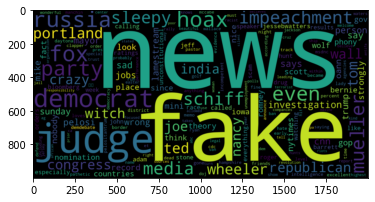

In [ ]:
wordcloud_decreased = WordCloud(width=2000, height=1000).generate_from_frequencies(decreased_counter)
plt.imshow(wordcloud_decreased, interpolation="bilinear")

The wordclouds for the dem states and all states do not differ much, so we can assume the words in Trump's tweet that influence people's activities have similar effects across states with different political affiliations.

#Sentiment Score

How about the sentiments? How does the president feel when he is sending all his tweets? Using the sentiment analysis tool from TextBlob, we give the tweets a score between -1 to 1 to denote the sentiment. The higher the score is, the more positive the tweet is.

In [ ]:
from textblob import TextBlob

trump_all_df['sentiment_score'] = trump_all_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
trump_all_df.head(10)

,text,favorites,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,dem_increased_faster,gop_increased_faster,battle_increased_faster,all_increased_faster,tokenized_text,contains_covid,sentiment_score
0,"Schiff is claiming the Senate must call ""impor...",0,11073,22,True,False,False,0.020408,1,1,1,1,"[schiff, claiming, senate, must, call, importa...",0,0.122222
1,Democrats rushed to impeach President @realDon...,0,6238,22,True,True,False,0.049505,1,1,1,1,"[democrats, rushed, impeach, president, ignori...",0,-0.125000
2,I hope Republicans are paying close attention ...,0,10878,22,True,False,False,0.030000,1,1,1,1,"[hope, republicans, paying, close, attention, ...",0,0.000000
3,"""This is the first time in history where a pre...",0,4137,22,True,False,False,0.010417,1,1,1,1,"[first, time, history, president, impeached, e...",0,0.250000
4,Speaker Pelosi's impeachment managers:\n◦ Chai...,0,8293,22,True,False,False,0.058252,1,1,1,1,"[speaker, pelosi, impeachment, managers, chair...",0,0.000000
5,Today the baseless impeachment case heads to a...,0,3114,22,True,False,False,0.051020,1,1,1,1,"[today, baseless, impeachment, case, heads, se...",0,0.000000
6,“[Schiff] went to the House and he manufacture...,0,7368,22,True,False,False,0.039216,1,1,1,1,"[schiff, went, house, manufactured, fraudulent...",0,0.000000
7,"Today, Adam Schiff once again tried to mislead...",0,7170,22,True,False,False,0.057143,1,1,1,1,"[today, adam, schiff, tried, mislead, american...",0,-0.100000
8,"Democrats, the impeachment prosecutors, basica...",0,13221,22,True,False,False,0.010101,1,1,1,1,"[democrats, impeachment, prosecutors, basicall...",0,-0.050000
9,What's dangerous for the future of this nation...,0,6667,22,True,False,False,0.030928,1,1,1,1,"[dangerous, future, nation, officials, like, a...",0,-0.333333


#Machine Learning!

## Preparing ML Models

The training data would be all columns except for the 4 binary-valued columns, `"all_increased_faster"`, `"dem_increased_faster"`, `"gop_increased_faster"`, `"battle_increased_faster"`. These four columns will be the labels that we are going to predict.

In [ ]:
train_df = trump_all_df[['retweets', 'date', 'is_retweet', 'contains_mention', 'contains_link', 'cap_ratio', 'contains_covid', 'sentiment_score']]
train_df

,retweets,date,is_retweet,contains_mention,contains_link,cap_ratio,contains_covid,sentiment_score
0,11073,22,True,False,False,0.020408,0,0.122222
1,6238,22,True,True,False,0.049505,0,-0.125000
2,10878,22,True,False,False,0.030000,0,0.000000
3,4137,22,True,False,False,0.010417,0,0.250000
4,8293,22,True,False,False,0.058252,0,0.000000
...,...,...,...,...,...,...,...,...
10476,13287,311,False,False,False,0.022624,0,-0.718519
10477,19257,311,False,True,False,0.060241,0,0.166667
10478,22224,311,False,False,False,0.059140,0,-0.093333
10479,45857,311,False,False,False,0.076923,0,0.333333


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

all_y = trump_all_df[['all_increased_faster']]
all_X_train, all_X_test, all_y_train, all_y_test = train_test_split(train_df, all_y)

## Linear Regression

First we would like to try ordinary least squares regression without any penalty:

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(all_X_train, all_y_train)
train_acc_lr = accuracy_score(all_y_train, linear_reg.predict(all_X_train).round())
test_acc_lr = accuracy_score(all_y_test, linear_reg.predict(all_X_test).round())
print("Training accuracy for ordinary linear regression: ", train_acc_lr)
print("Test accuracy for ordinary linear regression: ", test_acc_lr)

Training accuracy for ordinary linear regression:  0.5468193384223918
Test accuracy for ordinary linear regression:  0.5654330408241129


The test accuracy is even higher than the training accuracy, indicating that we already have enough data for training and the model did not overfit much. In this case, penalty should be unimportant, but we decided to try several of them anyway.

Then we would like to try Lasso Regression which uses L1 penalty:

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(all_X_train, all_y_train)
train_acc_l1 = accuracy_score(all_y_train, lasso.predict(all_X_train).round())
test_acc_l1= accuracy_score(all_y_test, lasso.predict(all_X_test).round())
print("Training accuracy for lasso linear regression: ", train_acc_l1)
print("Test accuracy for lasso linear regression: ", test_acc_l1)

Training accuracy for lasso linear regression:  0.5330788804071247
Test accuracy for lasso linear regression:  0.5505532239603205


And also Ridge Regression which uses L2 penalty:

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(all_X_train, all_y_train)
train_acc_l2 = accuracy_score(all_y_train, ridge.predict(all_X_train).round())
test_acc_l2 = accuracy_score(all_y_test, ridge.predict(all_X_test).round())
print("Training accuracy for ridge linear regression: ", train_acc_l2)
print("Test accuracy for ridge linear regression: ", test_acc_l2)

Training accuracy for ridge linear regression:  0.5464376590330788
Test accuracy for ridge linear regression:  0.5654330408241129


Lastly, Elastic Net, which combines both L1 and L2 penalty:

In [ ]:
from sklearn.linear_model import ElasticNet
en = ElasticNet().fit(all_X_train, all_y_train)
train_acc_l1l2 = accuracy_score(all_y_train, en.predict(all_X_train).round())
test_acc_l1l2 = accuracy_score(all_y_test, en.predict(all_X_test).round())
print("Training accuracy for elastic net linear regression: ", train_acc_l1l2)
print("Test accuracy for elastic net linear regression: ", test_acc_l1l2)

Training accuracy for elastic net linear regression:  0.5296437659033079
Test accuracy for elastic net linear regression:  0.5509347577260587


From the training and test accuracies reported above, we notice that the ordinary linear regression without any penalty worked the best, which confirmed our observation that we have sufficient amount of data for training and our model does not overfit.

## Logistic Regression

We would then like to use another simple model, Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(all_X_train, all_y_train.values.ravel())
train_acc_log = accuracy_score(all_y_train, lr.predict(all_X_train).round())
test_acc_log = accuracy_score(all_y_test, lr.predict(all_X_test).round())
print("Training accuracy for logistic regression: ", train_acc_log)
print("Test accuracy for logistic regression: ", test_acc_log)

Training accuracy for logistic regression:  0.5232824427480917
Test accuracy for logistic regression:  0.5452117512399848


## Support Vector Machine

We would then train another model, SVM, which is also widely used in classification tasks. 

In [ ]:
from sklearn.svm import SVC
svc = SVC().fit(all_X_train, all_y_train.values.ravel())
train_acc_svm = accuracy_score(all_y_train, svc.predict(all_X_train))
test_acc_svm = accuracy_score(all_y_test, svc.predict(all_X_test))
print("Training accuracy for SVM: ", train_acc_svm)
print("Test accuracy for SVM: ", test_acc_svm)

Training accuracy for SVM:  0.521501272264631
Test accuracy for SVM:  0.5448302174742464


## Random Forest

We would then like to try the Random Forest classifier, which uses an ensemble of trees to classify the tweets. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3).fit(all_X_train, all_y_train.values.ravel())
train_acc_rf = accuracy_score(all_y_train, rf.predict(all_X_train))
test_acc_rf = accuracy_score(all_y_test, rf.predict(all_X_test))
print("Training accuracy for Random Forest: ", train_acc_rf)
print("Test accuracy for Random Forest: ", test_acc_rf)

Training accuracy for Random Forest:  0.5942748091603054
Test accuracy for Random Forest:  0.6127432277756582


## AdaBoost

AdaBoost classifier, which uses a series of weak classifiers to do the prediction. From the training and test accuracy, we can see that the overfitting is indeed reduced.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier().fit(all_X_train, all_y_train.values.ravel())
train_acc_ada = accuracy_score(all_y_train, ada.predict(all_X_train))
test_acc_ada = accuracy_score(all_y_test, ada.predict(all_X_test))
print("Training accuracy for AdaBoost: ", train_acc_ada)
print("Test accuracy for AdaBoost: ", test_acc_ada)

Training accuracy for AdaBoost:  0.7239185750636132
Test accuracy for AdaBoost:  0.7096528042731782


## Gradient Boost

Lastly, we would like to train another boosting method, Gradient Boost. 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier().fit(all_X_train, all_y_train.values.ravel())
train_acc_gb = accuracy_score(all_y_train, gb.predict(all_X_train))
test_acc_gb = accuracy_score(all_y_test, gb.predict(all_X_test))
print("Training accuracy for Gradient Boost: ", train_acc_gb)
print("Test accuracy for Gradient Boost: ", test_acc_gb)

Training accuracy for Gradient Boost:  0.8916030534351145
Test accuracy for Gradient Boost:  0.8893552079359023


Since the model has high training accuracy and test accuracy, we want to take a deeper look at its performance. We are going to plot its confusion matrix down below: 

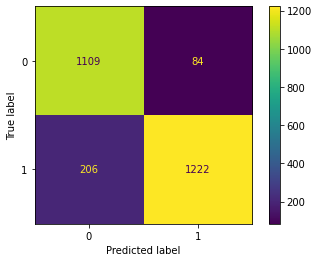

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gb, all_X_test, all_y_test, values_format='d')
plt.show()

The confusion matrix shows that the model's false negative rate is higher than the false positive rate. This trend points to possible improvements in the future: we can try to figure out what caused it and make the model even better.

##Compare models 

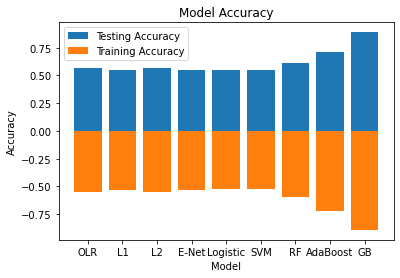

<Figure size 3200x1600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# line 1 points
x = np.array(['OLR','L1','L2','E-Net', 'Logistic','SVM','RF','AdaBoost','GB'])
y1 = np.array([train_acc_lr, train_acc_l1, train_acc_l2, train_acc_l1l2, train_acc_log, train_acc_svm, train_acc_rf, train_acc_ada, train_acc_gb])
# plotting the line 1 points 

# line 2 points
y2 = np.array([test_acc_lr, test_acc_l1, test_acc_l2, test_acc_l1l2, test_acc_log, test_acc_svm, test_acc_rf, test_acc_ada, test_acc_gb])
# plotting the line 2 points 
plt.bar(x, y2, label = "Testing Accuracy")
plt.bar(x, -y1, label = "Training Accuracy")
plt.xlabel('Model')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy')
# Set a title of the current axes.
plt.title('Model Accuracy')
# show a legend on the plot
plt.legend()

plt.figure(figsize=(40,20), dpi=80)
# Display a figure.
plt.show()

Note that the value of the accuracy in the above plot should be interpreted as its absolute value.

From the plot, we noticed that all the models achived test accuracy greater than 50%, which means they are all better than random guess. <br> 
Moreover, the gap between the training accuracy and test accuracy is small, indicating that the amount of our data is sufficient enough and the overfitting is not severe. 

At the end, we managed to get 88.9% testing accuracy using the Gradient Boost Model, which is pretty good: Nearly 90% of our model's prediction on future data would be correct! Now we know that Trump's tweets are actually a good indicator of the growth rate of confirmed COVID-19 cases.